/lab/raid/datasets/eye-tracking/iLab-Queens-FASD-EyeTracking/FASD eye dataset/snip20.tar.gz
(2149,)


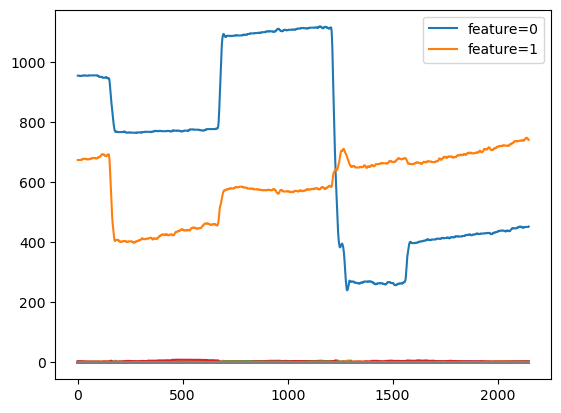

In [15]:
import torch
import tarfile
import numpy as np
import io
import os
import matplotlib.pyplot as plt

folder_path = '/lab/raid/datasets/eye-tracking/iLab-Queens-FASD-EyeTracking/FASD eye dataset'
filename = 'snip20.tar.gz'

tar_path = os.path.join(folder_path,filename)

print(tar_path)

with tarfile.open(tar_path, 'r:gz') as tar:
    for member in tar.getmembers():
        if member.name.endswith('control_rawdata.npy'):
            npy_file = tar.extractfile(member)
            loaded_array = np.load(npy_file,allow_pickle=True)

print(loaded_array[1][0][:,0].shape)
# print(len(loaded_array[1][0][:,0]))

num_time_points = len(loaded_array[1][0][:,0])
num_features = 48

timestamps = np.linspace(0,num_time_points-1,num_time_points)

for feature in range(num_features):
    feature_values = loaded_array[1][0][:,feature]
    if feature_values[8] > 50:
        plt.plot(timestamps,feature_values, label=f'feature={feature}')
    else:
        plt.plot(timestamps,feature_values)
plt.legend()
    